         Survived      Pclass         Sex         Age       SibSp       Parch  \
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000   
mean     0.383838    2.308642    0.647587   29.361582    0.523008    0.381594   
std      0.486592    0.836071    0.477990   13.019697    1.102743    0.806057   
min      0.000000    1.000000    0.000000    0.420000    0.000000    0.000000   
25%      0.000000    2.000000    0.000000   22.000000    0.000000    0.000000   
50%      0.000000    3.000000    1.000000   28.000000    0.000000    0.000000   
75%      1.000000    3.000000    1.000000   35.000000    1.000000    0.000000   
max      1.000000    3.000000    1.000000   80.000000    8.000000    6.000000   

             Fare    Embarked  
count  891.000000  891.000000  
mean    32.204208    0.361392  
std     49.693429    0.635673  
min      0.000000    0.000000  
25%      7.910400    0.000000  
50%     14.454200    0.000000  
75%     31.000000    1.000000  
max    512.329

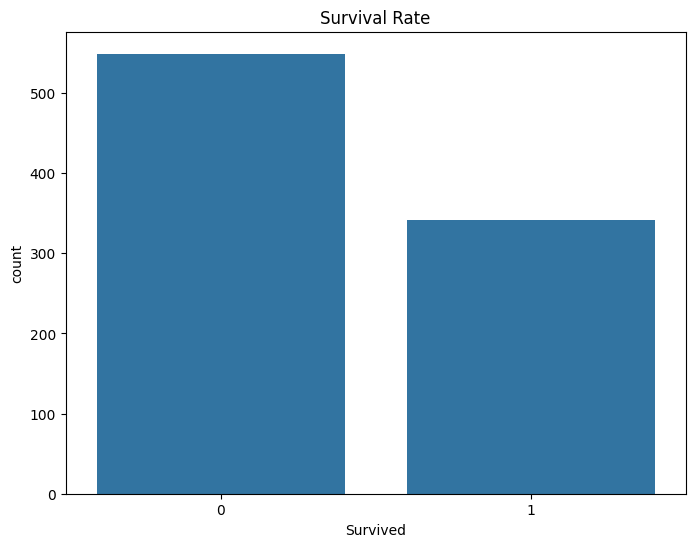

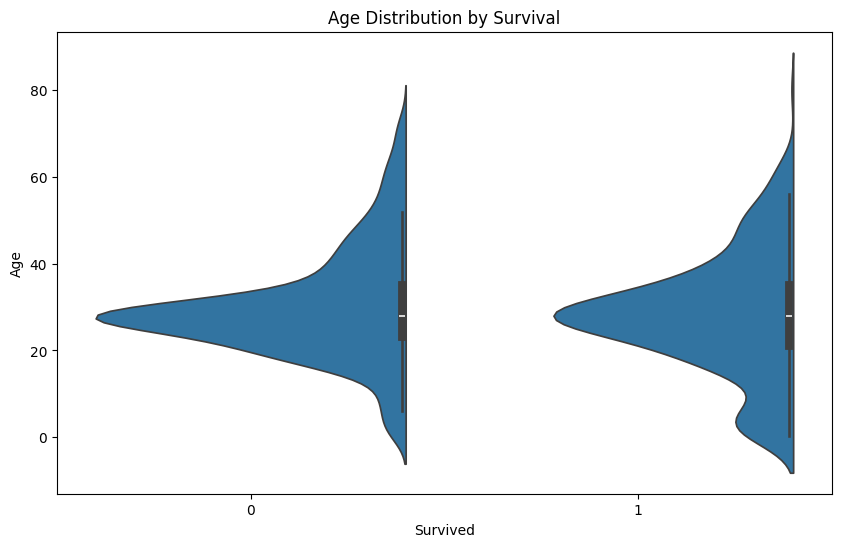

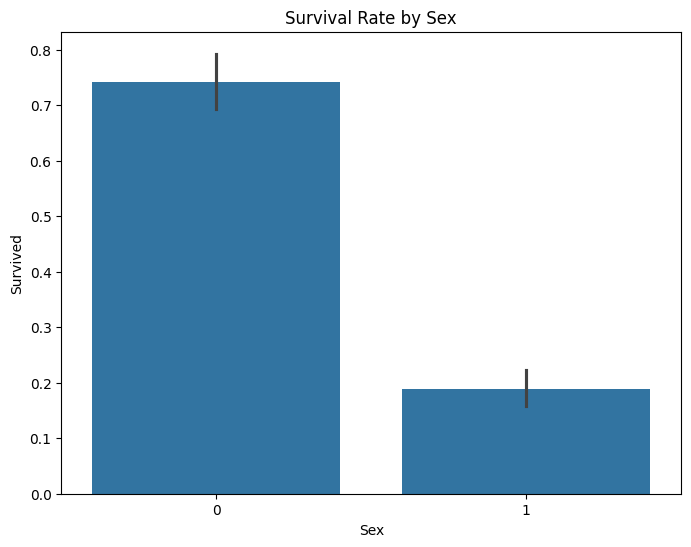

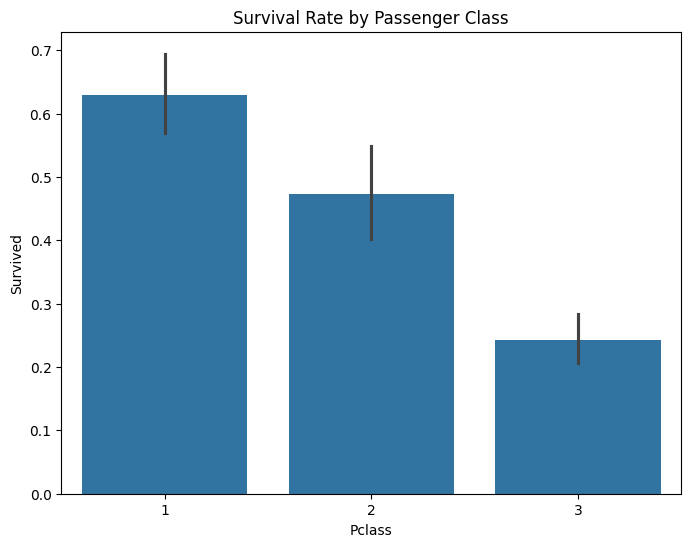

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
data = pd.read_csv(url)

# Data cleaning
# Drop unnecessary columns
data = data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

# Handle missing values
data['Age'] = data['Age'].fillna(data['Age'].median())
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

# Convert categorical variables to numerical
data['Sex'] = data['Sex'].map({'male': 1, 'female': 0})
data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Exploratory Data Analysis (EDA)
# Descriptive statistics
print(data.describe())

# Visualize the survival rate
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', data=data)
plt.title('Survival Rate')
plt.show()

# Explore the relationship between age and survival
plt.figure(figsize=(10, 6))
sns.violinplot(x='Survived', y='Age', data=data, split=True)
plt.title('Age Distribution by Survival')
plt.show()

# Explore the relationship between sex and survival
plt.figure(figsize=(8, 6))
sns.barplot(x='Sex', y='Survived', data=data)
plt.title('Survival Rate by Sex')
plt.show()

# Explore the relationship between passenger class and survival
plt.figure(figsize=(8, 6))
sns.barplot(x='Pclass', y='Survived', data=data)
plt.title('Survival Rate by Passenger Class')
plt.show()

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium import plugins

# Set up Kaggle API credentials
import os
os.environ['KAGGLE_USERNAME'] = "prasannkhamkar79"
os.environ['KAGGLE_KEY'] = "d85c4d8f6565793335482ed395954cd1"

# Download the dataset
import kaggle
kaggle.api.authenticate()
kaggle.api.dataset_download_files('sobhanmoosavi/us-accidents', path='./data', unzip=True)

# Load the dataset
data = pd.read_csv('data/US_Accidents_Dec21_updated.csv')

# Convert datetime columns
data['Start_Time'] = pd.to_datetime(data['Start_Time'])
data['End_Time'] = pd.to_datetime(data['End_Time'])

# Extract hour and month from Start_Time
data['Hour'] = data['Start_Time'].dt.hour
data['Month'] = data['Start_Time'].dt.month

# Analyze patterns related to road conditions and weather
print("Accidents by Road Condition:")
print(data['Road_Condition'].value_counts())

print("\nAccidents by Weather Condition:")
print(data['Weather_Condition'].value_counts())

# Visualize accident hotspots
accident_locations = data[['Start_Lat', 'Start_Lng']]
accident_map = folium.Map(location=[accident_locations.mean().values[0], accident_locations.mean().values[1]], zoom_start=6)
accident_hotspot = plugins.HeatMap(data=accident_locations, radius=15)
accident_hotspot.add_to(accident_map)

# Display the map
accident_map

# Analyze accidents by time of day
plt.figure(figsize=(10, 6))
sns.countplot(x='Hour', data=data)
plt.title('Accidents by Hour of Day')
plt.xticks(rotation=90)
plt.show()

# Analyze accidents by month
plt.figure(figsize=(10, 6))
sns.countplot(x='Month', data=data, order=sorted(data['Month'].unique()))
plt.title('Accidents by Month')
plt.xticks(rotation=90)
plt.show()

KeyError: 'Start_Time'